In [33]:
import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

### Содание класса пространства мира (клетки)

In [2]:
class Cell:
    '''
    Класс создаётся с атрибутами:
        position - позиция клетки в мире
        life_status - статус жизни в клекте
        neighbours - число соседей
    '''
    
    def __init__(self, position: list, life_status: bool) -> None:
        self.position = position
        self.life_status = life_status
        self.neighbours = None
        
    def __repr__(self) -> str:
        return f'cell, position: {self.position}, life: {self.life_status}, neighbours: {self.neighbours}'
        
    
    def born(self) -> None:
        '''метод зарождения жизни'''
        self.life_status = True
    
    
    def die(self) -> None:
        '''метод смерти'''
        self.life_status = False
    
    

### Создание класса мира

In [3]:
class Space:
    '''
    Класс создаётся с атрибутами:
        size - размер пространста, по умолчания [10,10]
        loop - статус зацикленности пространства, по умолчанию False
    '''
    
    def __init__(self, size: list=[10,10], loop: bool=False) -> None:
        
        self.size = size
        self.loop = loop
        self.epoch = 0
        

    def __repr__(self) -> str:
        
        return f'space, size: {self.size}, loop: {self.loop}, epoch: {self.epoch}'
    
    
    
    def random_first_generation(self, weights:list=[10,1]) -> None:
        '''случайная генерация первого поколения'''
        
        cell_list = []
        for i in range(self.size[0]):
            cell_j_list = []
            for j in range(self.size[1]):
                cell_j_list.append(Cell([i,j], random.choices(population=[False, True], weights=weights)[0]))
            cell_list.append(cell_j_list)
        self.cells = np.array(cell_list)
    
    
    
    def cells_life_status(self) -> np.array:
        '''возврат состояния пространста в виде np.array'''
        
        cells_life_status_list = []
        for i in range(self.size[0]):
            cells_life_status_j_list = []
            for j in range(self.size[1]):
                cells_life_status_j_list.append(self.cells[i][j].life_status)
            cells_life_status_list.append(cells_life_status_j_list)

        return np.array(cells_life_status_list)
    
    
    
    def recalculation_neighbours(self) -> None:
        '''расчёт числа соседей для всех клеток'''
        
        # проход по всем клеткам, кроме последней строки и последнего столбца
        for i in range(self.size[0]-1):
            for j in range(self.size[1]-1):
                self.cells[i][j].neighbours = (
                                  self.cells[i-1][j-1].life_status +
                                  self.cells[i-1][j].life_status +
                                  self.cells[i-1][j+1].life_status +
                                  self.cells[i][j-1].life_status +
                                  self.cells[i][j+1].life_status +
                                  self.cells[i+1][j-1].life_status +
                                  self.cells[i+1][j].life_status +
                                  self.cells[i+1][j+1].life_status
                                 )

        # проход по последнему столбцу, кроме последней строки
        j = self.size[1]-1
        for i in range(self.size[0]-1):
            self.cells[i][j].neighbours = (
                              self.cells[i-1][j-1].life_status +
                              self.cells[i-1][j].life_status +
                              self.cells[i-1][0].life_status +
                              self.cells[i][j-1].life_status +
                              self.cells[i][0].life_status +
                              self.cells[i+1][j-1].life_status +
                              self.cells[i+1][j].life_status +
                              self.cells[i+1][0].life_status
                             )

        # проход по последней строке, кроме последнего столбца
        i = self.size[0]-1
        for j in range(self.size[1]-1):
            self.cells[i][j].neighbours = (
                              self.cells[i-1][j-1].life_status +
                              self.cells[i-1][j].life_status +
                              self.cells[i-1][j+1].life_status +
                              self.cells[i][j-1].life_status +
                              self.cells[i][j+1].life_status +
                              self.cells[0][j-1].life_status +
                              self.cells[0][j].life_status +
                              self.cells[0][j+1].life_status
                             )

        # последняя клетка
        i = self.size[0]-1
        j = self.size[1]-1
        self.cells[i][j].neighbours = (
                          self.cells[i-1][j-1].life_status +
                          self.cells[i-1][j].life_status +
                          self.cells[i-1][0].life_status +
                          self.cells[i][j-1].life_status +
                          self.cells[i][0].life_status +
                          self.cells[0][j-1].life_status +
                          self.cells[0][j].life_status +
                          self.cells[0][0].life_status
                         )

    
    def new_epoch(self) -> None:
        '''пересчёт состояния новой эпохи'''
        
        # проход по всем клеткам
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                
                # если клетка была мёртвой, зародить жизнь при 3 живых соседях
                if not(self.cells[i][j].life_status) and self.cells[i][j].neighbours == 3:
                    self.cells[i][j].born()
                # если клетка была живой, умертвить жизнь если нет 2-3 живых соседей
                elif self.cells[i][j].life_status and self.cells[i][j].neighbours not in [2,3]:
                    self.cells[i][j].die()
        
        self.epoch += 1

### Запуск эксперимента жизни

In [73]:
space = Space([30,30], False)
space.random_first_generation([5,1])
space

space, size: [30, 30], loop: False, epoch: 0

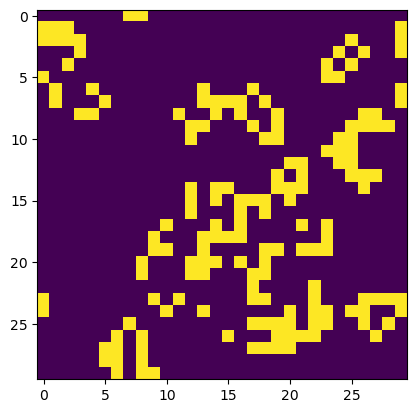

In [76]:
plt.ion()
for _ in range(10):
    space.recalculation_neighbours()
    space.new_epoch()
    plt.clf()
    plt.imshow(space.cells_life_status())
    plt.draw()
    plt.gcf().canvas.flush_events()
    time.sleep(0.1)
plt.ioff()
plt.show()

In [68]:
ims[0][0]
plt.show()

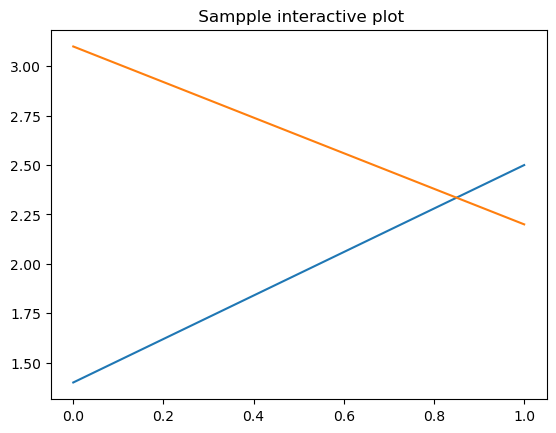

In [80]:
import matplotlib.pyplot as plt 
   
plt.ion() 
plt.plot([1.4, 2.5]) 
plt.title(" Sampple interactive plot") 

axes = plt.gca() 

axes.plot([3.1, 2.2])

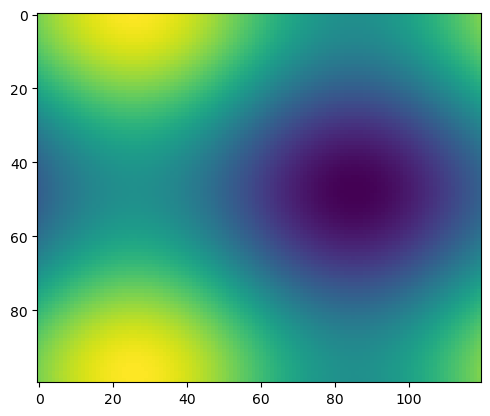

In [60]:
fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15
    y += np.pi / 30
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
plt.show()